# Crime Data

In [122]:
# Dependencies and Setup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import json
from config import api_key
%matplotlib inline

# API endpoint and API key
base = 'https://api.usa.gov/crime/fbi/cde/'
query = 'arrest/national/all?from=2018&to=2021&API_KEY=' #National Arrests
key = api_key 


### TEXAS Crime Data

In [123]:
# API endpoint and API key for Texas crime data
base_data = 'https://api.usa.gov/crime/fbi/cde/'
query_tx = 'arrest/state/TX/all?from=2018&to=2021&API_KEY='
key_tx = api_key

# Make the API request for Texas crime data and load the response as JSON
response_tx = requests.get(base_data + query_tx + key_tx)

# Check if the API request was successful
if response_tx.status_code == 200:
    data_data = json.loads(response_tx.content)
else:
    print("Error: API request failed with status code {}".format(response_tx.status_code))
    

In [124]:
# Convert the response to a DataFrame for Texas crime data
tx_crime_df = pd.DataFrame(data_data['data'])
# Rename year column
tx_crime_df = tx_crime_df.rename(columns={'data_year': 'Year'})
tx_crime_df


,Year,Aggravated Assault,All Other Offenses (Except Traffic),Arson,Burglary,Curfew and Loitering Law Violations,Disorderly Conduct,Driving Under the Influence,Drug Abuse Violations - Grand Total,Drunkenness,...,Prostitution and Commercialized Vice,Rape,Robbery,Simple Assault,"Stolen Property: Buying, Receiving, Possessing",Suspicion,Vagrancy,Vandalism,"Weapons: Carrying, Possessing, Etc.","Sex Offenses (Except Rape, and Prostitution and Commercialized Vice)"
0,2018,26859,221269,431,9557,1673,7943,73523,147455,58319,...,4028,2183,5915,96591,898,3,531,7627,13693,2576
1,2019,26877,188748,453,8904,1249,7204,69563,124377,50428,...,3029,2149,5877,78332,801,25,537,7370,11678,1635
2,2020,23802,126629,453,7952,1080,5689,59123,86570,31328,...,1482,1769,5220,76722,867,0,660,6383,13465,1136
3,2021,23516,167025,538,7238,456,5474,62245,83778,0,...,1919,1730,4616,80233,1015,0,710,7217,16972,856


In [125]:
# Get sum of all violent crime categories and add to new columng called "Violent Crimes"
tx_crime_df['Violent Crimes'] = tx_crime_df.loc[:, ['Aggravated Assault', 
                                            'Murder and Nonnegligent Manslaughter', 
                                            'Rape', 'Robbery', 'Simple Assault']].sum(axis=1)
# Get sum of property crimes and add to new column called "Property Crimes"
tx_crime_df['Property Crimes'] = tx_crime_df.loc[:, ['Arson', 'Burglary', 'Larceny - Theft', 'Motor Vehicle Theft']].sum(axis=1)
# Get sum of all non-violent crime categories and add to new columng called "Non-Violent Crimes"                                        
tx_crime_df['All Other Crimes'] = tx_crime_df.loc[:, ['All Other Offenses (Except Traffic)','Curfew and Loitering Law Violations',
                                            'Disorderly Conduct','Driving Under the Influence', 'Drug Abuse Violations - Grand Total',
                                            'Drunkenness', 'Embezzlement', 'Forgery and Counterfeiting', 'Fraud', 'Gambling - Total',
                                            'Human Trafficking - Commercial Sex Acts', 'Human Trafficking - Involuntary Servitude',
                                            'Liquor Laws', 'Manslaughter by Negligence','Offenses Against the Family and Children',
                                            'Prostitution and Commercialized Vice','Stolen Property: Buying, Receiving, Possessing',
                                            'Suspicion', 'Vagrancy', 'Vandalism','Weapons: Carrying, Possessing, Etc.',
                                            'Sex Offenses (Except Rape, and Prostitution and Commercialized Vice)']].sum(axis=1)
tx_crime_df                                           

,Year,Aggravated Assault,All Other Offenses (Except Traffic),Arson,Burglary,Curfew and Loitering Law Violations,Disorderly Conduct,Driving Under the Influence,Drug Abuse Violations - Grand Total,Drunkenness,...,Simple Assault,"Stolen Property: Buying, Receiving, Possessing",Suspicion,Vagrancy,Vandalism,"Weapons: Carrying, Possessing, Etc.","Sex Offenses (Except Rape, and Prostitution and Commercialized Vice)",Violent Crimes,Property Crimes,All Other Crimes
0,2018,26859,221269,431,9557,1673,7943,73523,147455,58319,...,96591,898,3,531,7627,13693,2576,132321,78770,565091
1,2019,26877,188748,453,8904,1249,7204,69563,124377,50428,...,78332,801,25,537,7370,11678,1635,113980,72931,490074
2,2020,23802,126629,453,7952,1080,5689,59123,86570,31328,...,76722,867,0,660,6383,13465,1136,108474,55748,350890
3,2021,23516,167025,538,7238,456,5474,62245,83778,0,...,80233,1015,0,710,7217,16972,856,111201,51034,362847


In [126]:
# Drop all columns except totals and data years
tx_crime_df.drop(
    labels=["Aggravated Assault","All Other Offenses (Except Traffic)", "Arson", "Burglary",
       "Curfew and Loitering Law Violations", "Disorderly Conduct","Driving Under the Influence",
       "Drug Abuse Violations - Grand Total", "Drunkenness", "Embezzlement", "Forgery and Counterfeiting", "Fraud",
       "Gambling - Total", "Human Trafficking - Commercial Sex Acts", "Human Trafficking - Involuntary Servitude",
       "Larceny - Theft", "Liquor Laws", "Manslaughter by Negligence", "Motor Vehicle Theft",
       "Murder and Nonnegligent Manslaughter", "Offenses Against the Family and Children","Prostitution and Commercialized Vice",
       "Rape", "Robbery", "Simple Assault", "Stolen Property: Buying, Receiving, Possessing", "Suspicion", "Vagrancy", "Vandalism",
       "Weapons: Carrying, Possessing, Etc.","Sex Offenses (Except Rape, and Prostitution and Commercialized Vice)"],
       axis=1, inplace=True)
# Add total crimes column
tx_crime_df['Total Crimes'] = tx_crime_df.loc[:, ['Property Crimes', 'Violent Crimes', 'All Other Crimes']].sum(axis=1)
tx_crime_df

,Year,Violent Crimes,Property Crimes,All Other Crimes,Total Crimes
0,2018,132321,78770,565091,776182
1,2019,113980,72931,490074,676985
2,2020,108474,55748,350890,515112
3,2021,111201,51034,362847,525082


Text(0, 0.5, 'Number of Crimes (charged)')

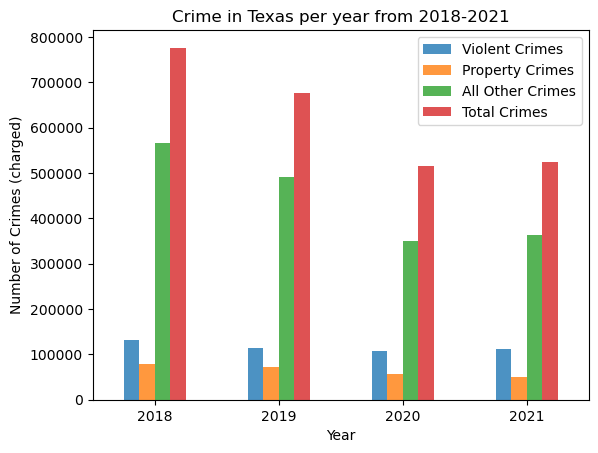

In [127]:
# Plot TX crimes in bar chart
tx_crime_df.plot.bar(x='Year', y=None, align="center", alpha=0.8, rot=0)
plt.title("Crime in Texas per year from 2018-2021")
plt.xlabel("Year")
plt.ylabel("Number of Crimes (charged)")


## Texas Data Conclusion
##### Total crime in Texas has decreased from 2018 to 2021. Violent crime has stayed about the same from year to year. Property crime has decreased from 2018 to 2021 but has stayed about the same the last couple of years. Overall, property crime only accounts for about 8.5% of total crime in Texas.

### CALIFORNIA Crime Data

In [128]:
# API endpoint and API key for California crime data
base_data = 'https://api.usa.gov/crime/fbi/cde/'
query_ca = 'arrest/state/CA/all?from=2018&to=2021&API_KEY='
key_ca = api_key

# Make the API request for CA crime data and load the response as JSON
response_ca = requests.get(base_data + query_ca + key_ca)

# Check if the API request was successful
if response_ca.status_code == 200:
    data_data = json.loads(response_ca.content)
else:
    print("Error {}".format(response_ca.status_code))

In [129]:
# Convert the response to a DataFrame for California crime data
ca_crime_df = pd.DataFrame(data_data['data'])
# Rename year column
ca_crime_df = ca_crime_df.rename(columns={'data_year': 'Year'})
ca_crime_df

,Year,Aggravated Assault,All Other Offenses (Except Traffic),Arson,Burglary,Curfew and Loitering Law Violations,Disorderly Conduct,Driving Under the Influence,Drug Abuse Violations - Grand Total,Drunkenness,...,Prostitution and Commercialized Vice,Rape,Robbery,Simple Assault,"Stolen Property: Buying, Receiving, Possessing",Suspicion,Vagrancy,Vandalism,"Weapons: Carrying, Possessing, Etc.","Sex Offenses (Except Rape, and Prostitution and Commercialized Vice)"
0,2018,89618,293353,1529,35230,652,3451,127250,219251,58286,...,6418,2539,16670,81812,16227,1,7290,16652,28290,8901
1,2019,85533,271853,1575,33741,711,3265,122594,218674,55098,...,5786,2203,15795,79617,15168,0,4793,16811,27496,8803
2,2020,83289,196723,2051,26220,395,2636,95778,185985,35841,...,4453,2060,13636,68962,14631,0,3289,17493,28407,7258
3,2021,3373,40427,139,910,56,97,4858,11629,0,...,363,67,812,8565,1218,0,322,1354,2103,125


In [130]:
# Get sum of all violent crime categories and add to new columng called "Violent Crimes"
ca_crime_df['Violent Crimes'] = ca_crime_df.loc[:, ['Aggravated Assault', 
                                            'Murder and Nonnegligent Manslaughter', 
                                            'Rape', 'Robbery', 'Simple Assault']].sum(axis=1)
# Get sum of all property crimes and add in column called "Property Crimes"
ca_crime_df['Property Crimes'] = ca_crime_df.loc[:, ['Arson', 'Burglary', 'Larceny - Theft', 'Motor Vehicle Theft']].sum(axis=1)
# Get sum of all other crime categories and add to new columng called "All Other Crimes"                                        
ca_crime_df['All Other Crimes'] = ca_crime_df.loc[:, ['All Other Offenses (Except Traffic)','Curfew and Loitering Law Violations',
                                            'Disorderly Conduct','Driving Under the Influence', 'Drug Abuse Violations - Grand Total',
                                            'Drunkenness', 'Embezzlement', 'Forgery and Counterfeiting', 'Fraud', 'Gambling - Total',
                                            'Human Trafficking - Commercial Sex Acts', 'Human Trafficking - Involuntary Servitude',
                                            'Liquor Laws', 'Manslaughter by Negligence','Offenses Against the Family and Children',
                                            'Prostitution and Commercialized Vice','Stolen Property: Buying, Receiving, Possessing',
                                            'Suspicion', 'Vagrancy', 'Vandalism','Weapons: Carrying, Possessing, Etc.',
                                            'Sex Offenses (Except Rape, and Prostitution and Commercialized Vice)']].sum(axis=1)
# Drop all columns except totals and data years
ca_crime_df.drop(
    labels=["Aggravated Assault","All Other Offenses (Except Traffic)", "Arson", "Burglary",
       "Curfew and Loitering Law Violations", "Disorderly Conduct","Driving Under the Influence",
       "Drug Abuse Violations - Grand Total", "Drunkenness", "Embezzlement", "Forgery and Counterfeiting", "Fraud",
       "Gambling - Total", "Human Trafficking - Commercial Sex Acts", "Human Trafficking - Involuntary Servitude",
       "Larceny - Theft", "Liquor Laws", "Manslaughter by Negligence", "Motor Vehicle Theft",
       "Murder and Nonnegligent Manslaughter", "Offenses Against the Family and Children","Prostitution and Commercialized Vice",
       "Rape", "Robbery", "Simple Assault", "Stolen Property: Buying, Receiving, Possessing", "Suspicion", "Vagrancy", "Vandalism",
       "Weapons: Carrying, Possessing, Etc.","Sex Offenses (Except Rape, and Prostitution and Commercialized Vice)"],
       axis=1, inplace=True)
# Add total crimes column
ca_crime_df['Total Crimes'] = ca_crime_df.loc[:, ['Property Crimes', 'Violent Crimes', 'All Other Crimes']].sum(axis=1)
ca_crime_df

,Year,Violent Crimes,Property Crimes,All Other Crimes,Total Crimes
0,2018,192048,97247,804028,1093323
1,2019,184468,91053,769254,1044775
2,2020,169541,72990,605335,847866
3,2021,12887,3853,63370,80110


Text(0, 0.5, 'Number of Crimes (charged)')

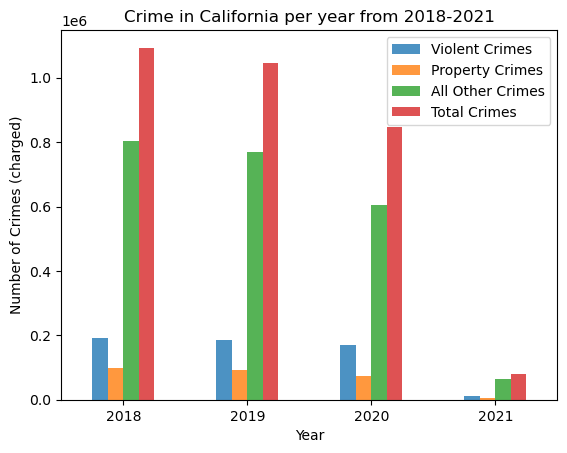

In [131]:
# Plot CA crimes in bar chart
ca_crime_df.plot.bar(x='Year', y=None, align="center", alpha=0.8, rot=0)
plt.title("Crime in California per year from 2018-2021")
plt.xlabel("Year")
plt.ylabel("Number of Crimes (charged)")

## California Data Conclusion
##### Total crime in California has decreased from 2018 to 2021. All crime decreased significantly from 2020 to 2021. Property crime accounts for about 5% of total crime.

### MICHIGAN Crime Data

In [132]:
# API endpoint and API key for MI crime data
base_data = 'https://api.usa.gov/crime/fbi/cde/'
query_mi = 'arrest/state/MI/all?from=2018&to=2021&API_KEY='
key_mi = api_key

# Make the API request for MI crime data and load the response as JSON
response_mi = requests.get(base_data + query_mi + key_mi)

# Check if the API request was successful
if response_mi.status_code == 200:
    data_data = json.loads(response_mi.content)
else:
    print("Error {}".format(response_mi.status_code))

In [133]:
# Convert the response to a DataFrame for California crime data
mi_crime_df = pd.DataFrame(data_data['data'])
# Rename year column
mi_crime_df = mi_crime_df.rename(columns={'data_year': 'Year'})
mi_crime_df

,Year,Aggravated Assault,All Other Offenses (Except Traffic),Arson,Burglary,Curfew and Loitering Law Violations,Disorderly Conduct,Driving Under the Influence,Drug Abuse Violations - Grand Total,Drunkenness,...,Prostitution and Commercialized Vice,Rape,Robbery,Simple Assault,"Stolen Property: Buying, Receiving, Possessing",Suspicion,Vagrancy,Vandalism,"Weapons: Carrying, Possessing, Etc.","Sex Offenses (Except Rape, and Prostitution and Commercialized Vice)"
0,2018,10351,84988,208,3056,250,5727,26193,30719,284,...,224,1005,1207,29318,1997,0,105,2898,4792,684
1,2019,10169,81463,220,2584,187,5584,25835,13963,346,...,451,908,1275,29125,2210,0,79,3030,5398,620
2,2020,10847,48000,192,2374,115,3760,20868,11285,125,...,213,761,1060,26895,2134,0,55,2673,9376,486
3,2021,10597,44631,196,2083,112,3343,21397,12392,0,...,104,824,886,25970,2156,0,34,2785,10145,553


In [134]:
# Get sum of all violent crime categories and add to new columng called "Violent Crimes"
mi_crime_df['Violent Crimes'] = mi_crime_df.loc[:, ['Aggravated Assault', 
                                            'Murder and Nonnegligent Manslaughter', 
                                            'Rape', 'Robbery', 'Simple Assault']].sum(axis=1)
# Get sum of all property crimes and add in column called "Property Crimes"
mi_crime_df['Property Crimes'] = mi_crime_df.loc[:, ['Arson', 'Burglary', 'Larceny - Theft', 'Motor Vehicle Theft']].sum(axis=1)
# Get sum of all non-violent crime categories and add to new columng called "Violent Crimes"                                        
mi_crime_df['All Other Crimes'] = mi_crime_df.loc[:, ['All Other Offenses (Except Traffic)', 'Arson', 
                                            'Burglary','Curfew and Loitering Law Violations', 'Disorderly Conduct',
                                            'Driving Under the Influence', 'Drug Abuse Violations - Grand Total',
                                            'Drunkenness', 'Embezzlement', 'Forgery and Counterfeiting', 'Fraud',
                                            'Gambling - Total', 'Human Trafficking - Commercial Sex Acts',
                                            'Human Trafficking - Involuntary Servitude', 'Larceny - Theft',
                                            'Liquor Laws', 'Manslaughter by Negligence', 'Motor Vehicle Theft',
                                            'Offenses Against the Family and Children','Prostitution and Commercialized Vice',
                                            'Stolen Property: Buying, Receiving, Possessing',
                                            'Suspicion', 'Vagrancy', 'Vandalism','Weapons: Carrying, Possessing, Etc.',
                                            'Sex Offenses (Except Rape, and Prostitution and Commercialized Vice)']].sum(axis=1)
# Drop all columns except totals and data years
mi_crime_df.drop(
    labels=["Aggravated Assault","All Other Offenses (Except Traffic)", "Arson", "Burglary",
       "Curfew and Loitering Law Violations", "Disorderly Conduct","Driving Under the Influence",
       "Drug Abuse Violations - Grand Total", "Drunkenness", "Embezzlement", "Forgery and Counterfeiting", "Fraud",
       "Gambling - Total", "Human Trafficking - Commercial Sex Acts", "Human Trafficking - Involuntary Servitude",
       "Larceny - Theft", "Liquor Laws", "Manslaughter by Negligence", "Motor Vehicle Theft",
       "Murder and Nonnegligent Manslaughter", "Offenses Against the Family and Children","Prostitution and Commercialized Vice",
       "Rape", "Robbery", "Simple Assault", "Stolen Property: Buying, Receiving, Possessing", "Suspicion", "Vagrancy", "Vandalism",
       "Weapons: Carrying, Possessing, Etc.","Sex Offenses (Except Rape, and Prostitution and Commercialized Vice)"],
       axis=1, inplace=True)
# Add total crimes column
mi_crime_df['Total Crimes'] = mi_crime_df.loc[:, ['All Other Crimes', 'Violent Crimes', 'Property Crimes']].sum(axis=1)
mi_crime_df

,Year,Violent Crimes,Property Crimes,All Other Crimes,Total Crimes
0,2018,42164,23373,195441,260978
1,2019,41832,22287,173433,237552
2,2020,39911,15032,121423,176366
3,2021,38655,13223,117056,168934


Text(0, 0.5, 'Number of Crimes (charged)')

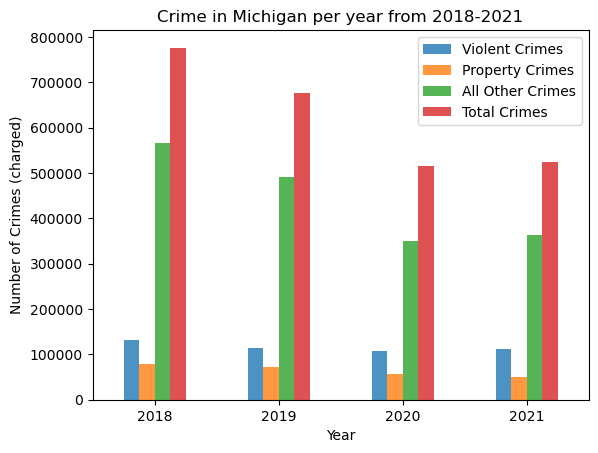

In [135]:
# Plot MI crimes in bar chart
tx_crime_df.plot.bar(x='Year', y=None, align="center", alpha=0.8, rot=0)
plt.title("Crime in Michigan per year from 2018-2021")
plt.xlabel("Year")
plt.ylabel("Number of Crimes (charged)")

## Michigan Data Conclusion
##### Total crime in Michigan has decreased from 2018 to 2021. Violent crimes and property crimes have both stayed about the same from year to year. Property crimes account for about 7.8% of Total crime.

## combined dfs

In [136]:
# Merge TX and CA dataframes
combined_crime_df = pd.merge(tx_crime_df, ca_crime_df, how='outer', on='Year')
combined_crime_df.head()

,Year,Violent Crimes_x,Property Crimes_x,All Other Crimes_x,Total Crimes_x,Violent Crimes_y,Property Crimes_y,All Other Crimes_y,Total Crimes_y
0,2018,132321,78770,565091,776182,192048,97247,804028,1093323
1,2019,113980,72931,490074,676985,184468,91053,769254,1044775
2,2020,108474,55748,350890,515112,169541,72990,605335,847866
3,2021,111201,51034,362847,525082,12887,3853,63370,80110


In [137]:
# Rename x and y columns to TX and CA
combined_crime_df = combined_crime_df.rename(columns={"Violent Crimes_x":"TX Violent Crimes",
                                                    "Property Crimes_x":"TX Property Crimes",
                                                    "All Other Crimes_x":"TX All Other Crimes",
                                                    "Total Crimes_x":"TX Total Crimes"})
combined_crime_df = combined_crime_df.rename(columns={"Violent Crimes_y":"CA Violent Crimes",
                                                    "Property Crimes_y":"CA Property Crimes",
                                                    "All Other Crimes_y":"CA All Other Crimes",
                                                    "Total Crimes_y":"CA Total Crimes"})
combined_crime_df.head()                                                                                                   

,Year,TX Violent Crimes,TX Property Crimes,TX All Other Crimes,TX Total Crimes,CA Violent Crimes,CA Property Crimes,CA All Other Crimes,CA Total Crimes
0,2018,132321,78770,565091,776182,192048,97247,804028,1093323
1,2019,113980,72931,490074,676985,184468,91053,769254,1044775
2,2020,108474,55748,350890,515112,169541,72990,605335,847866
3,2021,111201,51034,362847,525082,12887,3853,63370,80110


In [138]:
# Merge combined dataframe with the MI dataframe
combined_crime_df = pd.merge(combined_crime_df, mi_crime_df, how="outer", on="Year")
combined_crime_df

,Year,TX Violent Crimes,TX Property Crimes,TX All Other Crimes,TX Total Crimes,CA Violent Crimes,CA Property Crimes,CA All Other Crimes,CA Total Crimes,Violent Crimes,Property Crimes,All Other Crimes,Total Crimes
0,2018,132321,78770,565091,776182,192048,97247,804028,1093323,42164,23373,195441,260978
1,2019,113980,72931,490074,676985,184468,91053,769254,1044775,41832,22287,173433,237552
2,2020,108474,55748,350890,515112,169541,72990,605335,847866,39911,15032,121423,176366
3,2021,111201,51034,362847,525082,12887,3853,63370,80110,38655,13223,117056,168934


In [139]:
# Rename MI columns
combined_crime_df = combined_crime_df.rename(columns={"Violent Crimes":"MI Violent Crimes",
                                                    "Property Crimes":"MI Property Crimes",
                                                    "All Other Crimes":"MI All Other Crimes",
                                                    "Total Crimes":"MI Total Crimes"})
combined_crime_df.head()                                                   

,Year,TX Violent Crimes,TX Property Crimes,TX All Other Crimes,TX Total Crimes,CA Violent Crimes,CA Property Crimes,CA All Other Crimes,CA Total Crimes,MI Violent Crimes,MI Property Crimes,MI All Other Crimes,MI Total Crimes
0,2018,132321,78770,565091,776182,192048,97247,804028,1093323,42164,23373,195441,260978
1,2019,113980,72931,490074,676985,184468,91053,769254,1044775,41832,22287,173433,237552
2,2020,108474,55748,350890,515112,169541,72990,605335,847866,39911,15032,121423,176366
3,2021,111201,51034,362847,525082,12887,3853,63370,80110,38655,13223,117056,168934


Text(0, 0.5, 'Number of Crimes (charged)')

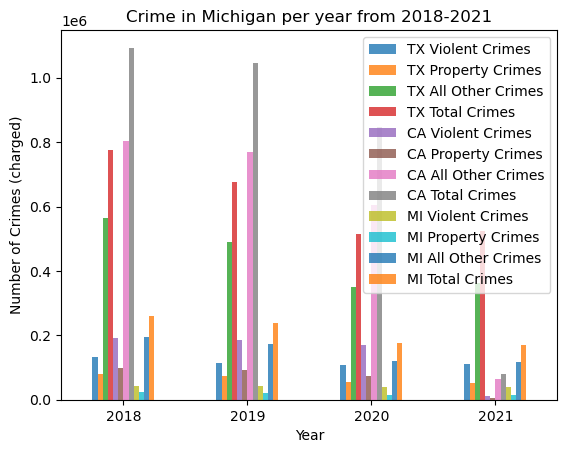

In [151]:
# Plot MI crimes in bar chart
combined_crime_df.plot.bar(x='Year', y=None, align="center", alpha=0.8, rot=0)
plt.title("Crime in Michigan per year from 2018-2021")
plt.xlabel("Year")
plt.ylabel("Number of Crimes (charged)")